### Loading packages and setting up plot parameters

In [2]:
%matplotlib inline

In [3]:
import datetime as dt
import random
from MediumAPI import mediumparser
import pickle
import time
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [4]:
data_dir = '../data/'
filename = 'Final_Postdf_May19_May25.p'
npostdf = pickle.load(open(data_dir+filename,'rb'))

In [5]:
npostdf.columns

Index(['clap_count', 'detected_language', 'image_count', 'post_creatorId',
       'post_date', 'post_id', 'post_link_count', 'post_publication_id',
       'post_tags', 'post_url', 'publication_follower_count', 'read_time',
       'response_count', 'subtitle', 'title', 'unique_slug', 'word_count',
       'archive_date', 'full_text'],
      dtype='object')

In [7]:
npostdf.clap_count.max()

111136

In [5]:
#%% Defining Success
tag_labels = npostdf.post_tags.unique()
clap_target_q90 = npostdf[['clap_count','post_tags']].groupby('post_tags').quantile(0.9)
clap_target_q80 = npostdf[['clap_count','post_tags']].groupby('post_tags').quantile(0.8)
clap_target_q20 = npostdf[['clap_count','post_tags']].groupby('post_tags').quantile(0.2)

In [6]:
npostdf['clap_target_q20'] = pd.Series()
npostdf['clap_target_q80'] = pd.Series()
npostdf['clap_target_q90'] = pd.Series()
for tag in tag_labels:
    npostdf.loc[npostdf['post_tags']==tag,'clap_target_q90'] = clap_target_q90.loc[tag,'clap_count']
    npostdf.loc[npostdf['post_tags']==tag,'clap_target_q80'] = clap_target_q80.loc[tag,'clap_count']
    npostdf.loc[npostdf['post_tags']==tag,'clap_target_q20'] = clap_target_q20.loc[tag,'clap_count']

In [7]:
traindf = npostdf.copy()
traindf['y80'] = pd.Series(data=0)
traindf['y90'] = pd.Series(data=0)

for ii in traindf.index:
    if npostdf.loc[ii,'clap_count'] > npostdf.loc[ii,'clap_target_q90']:
        traindf.loc[ii,'y90'] = 1
    else: traindf.loc[ii,'y90'] = 0
    if npostdf.loc[ii,'clap_count'] > npostdf.loc[ii,'clap_target_q80']:
        traindf.loc[ii,'y80'] = 1
    else: traindf.loc[ii,'y80'] = 0


In [8]:
npostdf.tail()

,clap_count,detected_language,image_count,post_creatorId,post_date,post_id,post_link_count,post_publication_id,post_tags,post_url,...,response_count,subtitle,title,unique_slug,word_count,archive_date,full_text,clap_target_q20,clap_target_q80,clap_target_q90
4013,1,en,0,220317b9cf1,1526929526842,1d6043c9eaa7,0,,politics,https://medium.com/@supersonny68/politics-and-...,...,0,This is a post I’ve been meaning to write for ...,"Politics and Psychology — Emotional response, ...",politics-and-psychology-emotional-response-and...,1635,2018/05/21,"Politics and Psychology — Emotional response, ...",4.0,198.4,474.0
4014,1,en,1,7ef8ef6dca86,1527049786233,91668a86f945,0,,travel,https://medium.com/@zertabquaderi/a-walk-from-...,...,0,A very easy one and a half hour’s walk from Po...,A Walk from Pokhara to Ghandruk in Nepal,a-walk-from-pokhara-to-ghandruk-in-nepal-91668...,501,2018/05/23,A Walk from Pokhara to Ghandruk in Nepal A ver...,1.0,59.0,149.1
4015,1,en,0,1b4b91b8b319,1527062256734,ad2257107d63,2,,travel,https://medium.com/@activegeardepot/get-the-be...,...,0,"In this modern world, people have started show...",Get the Best Deal On High Quality Camping Gear...,get-the-best-deal-on-high-quality-camping-gear...,326,2018/05/23,Get the Best Deal On High Quality Camping Gear...,1.0,59.0,149.1
4016,1,en,1,a3ac26067226,1527062282673,f19556fa5b4d,1,,travel,https://medium.com/@calocalbizgroup/places-to-...,...,0,Never neglect the opportunity of giving yourse...,Places To Enjoy The Night When In Santa Clarita,places-to-enjoy-the-night-when-in-santa-clarit...,345,2018/05/23,Places To Enjoy The Night When In Santa Clarit...,1.0,59.0,149.1
4017,1,en,1,931e5c141eb6,1527232225458,8354cc637146,0,,travel,https://medium.com/@OutdoorJournal/editors-let...,...,0,"“Adventure is not outside man, it is within”",Editors Letter. Issue 6. Autumn 2014.,editors-letter-issue-6-8354cc637146,353,2018/05/25,Editors Letter. Issue 6. Autumn 2014. “Adventu...,1.0,59.0,149.1


In [9]:
npostdf['y'] = pd.Series()
for ii in npostdf.index:
    npostdf.loc[ii,'y'] = (npostdf.loc[ii,'clap_count'] > npostdf.loc[ii,'clap_target_q80'])

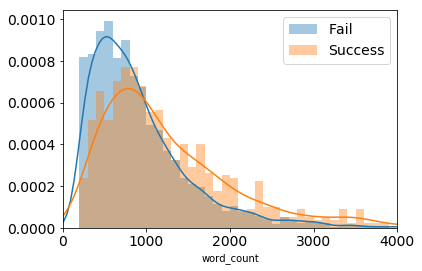

In [10]:
#sns.palplot(sns.color_palette("Set2"))
fontsize = 14
plt.figure(figsize=(6,4))
plt.rc('xtick', labelsize=fontsize)
plt.rc('ytick', labelsize=fontsize)
plt.rc('legend', fontsize=fontsize)
sns.distplot(npostdf.loc[npostdf['y']==False,'word_count'], bins = range(0,4000,100))
sns.distplot(npostdf.loc[npostdf['y'],'word_count'], bins = range(0,4000,100))
plt.xlim([0,4000])
plt.legend(['Fail','Success'])
plt.savefig('words.png')

In [11]:
from nltk.tokenize import sent_tokenize, word_tokenize
not_punctuation = lambda w: not (len(w)==1 and (not w.isalpha()))
get_word_count = lambda text: len([x for x in word_tokenize(text) if not_punctuation(x)])
get_sent_count = lambda text: len(sent_tokenize(text))
from nltk.corpus import cmudict
prondict = cmudict.dict()
numsyllables_pronlist = lambda l: len(list(filter(lambda s: s.lower()[-1].isdigit(), l)))

def numsyllables(word):
    try:
        return list(set(map(numsyllables_pronlist, prondict[word.lower()])))
    except KeyError:
        return [0]

def text_statistics(text):
    word_count = get_word_count(text)
    sent_count = get_sent_count(text)
    syllable_count = sum(map(lambda w: max(numsyllables(w)), word_tokenize(text)))
    complex_count = sum(map(lambda w: max(numsyllables(w))>2, word_tokenize(text)))
    return word_count, sent_count, syllable_count, complex_count

flesch_formula = lambda word_count, sent_count, syllable_count : 206.835 - 1.015*word_count/sent_count - 84.6*syllable_count/word_count
def flesch(text):
    word_count, sent_count, syllable_count, _ = text_statistics(text)
    return flesch_formula(word_count, sent_count, syllable_count)
 
fk_formula = lambda word_count, sent_count, syllable_count : 0.39 * word_count / sent_count + 11.8 * syllable_count / word_count - 15.59
def flesch_kincaid(text):
    word_count, sent_count, syllable_count, _ = text_statistics(text)
    return fk_formula(word_count, sent_count, syllable_count)


In [12]:
def gunning_fog(text):
    word_count, sent_count, syllable_count, complex_count = text_statistics(text)
    return 0.4*(word_count/sent_count + 100*(complex_count/word_count))

In [13]:
#traindf['FK_ease'] = traindf['full_text'].apply(flesch)
#traindf = npostdf.copy()
traindf['FK_grade'] = traindf['full_text'].apply(flesch_kincaid)
traindf['Gunning_fog'] = traindf['full_text'].apply(gunning_fog)

In [14]:
import seaborn as sns
sns.distplot(traindf.loc[(traindf['y']==False) & (traindf['post_tags']=='travel'),'FK_grade'], bins = np.linspace(0,40,80))
sns.distplot(traindf.loc[traindf['y'] & (traindf['post_tags']=='travel'),'FK_grade'], bins = np.linspace(0,40,80))

plt.xlim([0,20])
plt.legend(['Fail','Success'])
plt.savefig('readability1.png')

KeyError: 'y'

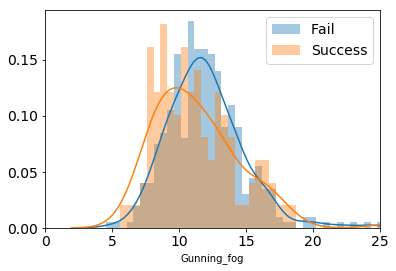

In [53]:
import seaborn as sns
sns.distplot(traindf.loc[(traindf['y']==False) & (traindf['post_tags']=='travel'),'Gunning_fog'], bins = np.linspace(0,40,80))
sns.distplot(traindf.loc[traindf['y'] & (traindf['post_tags']=='travel'),'Gunning_fog'], bins = np.linspace(0,40,80))

plt.xlim([0,25])
plt.legend(['Fail','Success'])
plt.savefig('readability2.png')

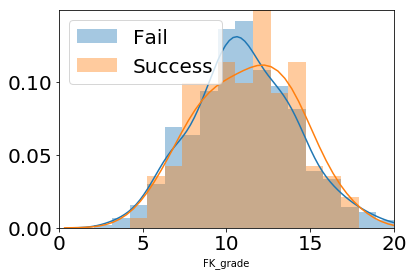

In [28]:
import seaborn as sns
sns.distplot(traindf.loc[(traindf['y']==False) & (traindf['post_tags']=='politics'),'FK_grade'], bins = np.linspace(0,20,20))
sns.distplot(traindf.loc[traindf['y'] & (traindf['post_tags']=='politics'),'FK_grade'], bins = np.linspace(0,20,20))

plt.xlim([0,20])
plt.legend(['Fail','Success'])
plt.savefig('readability3_politics.png')

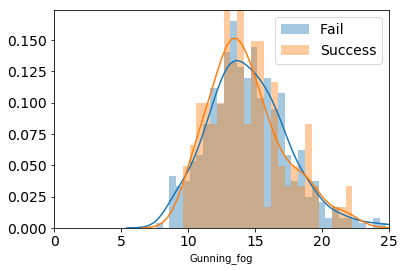

In [57]:
import seaborn as sns
sns.distplot(traindf.loc[(traindf['y']==False) & (traindf['post_tags']=='machine-learning'),'Gunning_fog'], bins = np.linspace(0,40,80))
sns.distplot(traindf.loc[traindf['y'] & (traindf['post_tags']=='machine-learning'),'Gunning_fog'], bins = np.linspace(0,40,80))

plt.xlim([0,25])
plt.legend(['Fail','Success'])
plt.savefig('words.png')

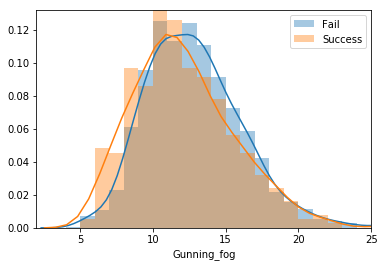

In [160]:
sns.distplot(traindf.loc[traindf['y_train']==False,'Gunning_fog'], bins = range(0,25))
sns.distplot(traindf.loc[traindf['y_train'],'Gunning_fog'], bins = range(0,25))
plt.legend(['Fail','Success'])
plt.xlim([2,25])
plt.savefig('GunningFog.png')


In [15]:
#%%
from nltk.sentiment.vader import SentimentIntensityAnalyzer
#nltk_get.download('vader_lexicon')
analyser = SentimentIntensityAnalyzer()
traindf['com'] = pd.Series()
traindf['neg'] = pd.Series()
traindf['neu'] = pd.Series()
traindf['pos'] = pd.Series()
for ii in traindf.index:
    snt = analyser.polarity_scores(traindf['full_text'][ii])
    traindf.loc[ii,'com'] = snt['compound']
    traindf.loc[ii,'neg'] = snt['neg']
    traindf.loc[ii,'neu'] = snt['neu']
    traindf.loc[ii,'pos'] = snt['pos']


C:\ProgramData\Anaconda3\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [16]:
traindf['question_count']= pd.Series()
for ii in traindf.index:
    traindf.loc[ii,'question_count'] = traindf.loc[ii,'full_text'].count('?')
    
traindf['title_wcount'] = traindf.title.apply(get_word_count) + traindf.subtitle.apply(get_word_count)


In [17]:
traindf.columns

Index(['clap_count', 'detected_language', 'image_count', 'post_creatorId',
       'post_date', 'post_id', 'post_link_count', 'post_publication_id',
       'post_tags', 'post_url', 'publication_follower_count', 'read_time',
       'response_count', 'subtitle', 'title', 'unique_slug', 'word_count',
       'archive_date', 'full_text', 'clap_target_q20', 'clap_target_q80',
       'clap_target_q90', 'y80', 'y90', 'FK_grade', 'Gunning_fog', 'com',
       'neg', 'neu', 'pos', 'question_count', 'title_wcount'],
      dtype='object')

In [18]:
#['clap_count', 'detected_language', 'image_count', 'post_creatorId',
#       'post_date', 'post_id', 'post_link_count', 'post_publication_id',
#       'post_tags', 'post_url', 'publication_follower_count', 'read_time',
#       'response_count', 'subtitle', 'title', 'unique_slug', 'word_count',
#       'archive_date', 'full_text', 'clap_target', 'y', 'FK_grade', 'com',
#       'neg', 'neu', 'pos']
trainingdf = traindf.drop(['clap_count', 'detected_language', 'post_creatorId',
       'post_date', 'post_id', 'post_publication_id', 
       'post_tags', 'post_url', 
       'response_count', 'subtitle', 'title', 'unique_slug', 'word_count',
       'archive_date', 'full_text', 'clap_target_q20', 'clap_target_q80', 'clap_target_q90',
                           'y80','y90','FK_grade','neg','pos'],axis=1).copy()


In [19]:
trainingdf.head()

,image_count,post_link_count,publication_follower_count,read_time,Gunning_fog,com,neu,question_count,title_wcount
0,46,4,369442,15.766981,12.690746,1.0000,0.787,5.0,22
1,11,32,335280,15.711321,10.805824,0.9997,0.801,16.0,26
2,7,1,31224,8.585849,9.998138,-0.9670,0.787,33.0,27
3,7,2,461544,9.970755,9.038865,0.9990,0.690,3.0,43
4,7,0,0,9.831132,10.045016,0.9989,0.824,20.0,28


In [20]:
X_raw = trainingdf.values
y = traindf['y80'].astype('int')

In [60]:
#%% Machine Learning
import numpy as np
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.gaussian_process.kernels import RBF
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing.data import QuantileTransformer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import roc_auc_score, recall_score, precision_score, f1_score, precision_recall_fscore_support
h = .02  # step size in the mesh


In [23]:
from sklearn.utils import class_weight
class_weight.compute_class_weight('balanced',classes=np.array([0,1]),y=y)

array([ 0.62507778,  2.49875622])

In [44]:
qScaler = QuantileTransformer(output_distribution='uniform')
stdScaler = StandardScaler() 
X = qScaler.fit_transform(X_raw)
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=.3, random_state=42)


In [45]:
np.unique(y_train)

array([0, 1])

In [46]:
#%%
names = ["Logistic Reg", "Naive Bayes", "Linear SVM", "Random Forest"]

classifiers = [
    LogisticRegression(class_weight='balanced'),
    GaussianNB(),
    SVC(kernel="rbf",class_weight='balanced',probability=True),
    RandomForestClassifier(max_depth=3, n_estimators=20, max_features=3, class_weight='balanced')]

models = [clf.fit(X_train, y_train) for clf in classifiers]



In [69]:
scores = [clf.score(X_test, y_test) for clf in models]
print(scores)

[0.6807628524046434, 0.7744610281923715, 0.63930348258706471, 0.72139303482587069]


In [48]:
ii=0
for clf in models:
    y_pred = clf.predict(X_test)
    print(names[ii],recall_score(y_test, y_pred))
    ii=ii+1


Logistic Reg 0.693486590038
Naive Bayes 0.344827586207
Linear SVM 0.681992337165
Random Forest 0.674329501916


In [61]:
ii=0
for clf in models:
    y_pred = clf.predict(X_test)
    print(names[ii],precision_recall_fscore_support(y_test, y_pred))
    ii=ii+1

Logistic Reg (array([ 0.89,  0.37]), array([ 0.68,  0.69]), array([ 0.77,  0.48]), array([945, 261], dtype=int64))
Naive Bayes (array([ 0.83,  0.47]), array([ 0.89,  0.34]), array([ 0.86,  0.4 ]), array([945, 261], dtype=int64))
Linear SVM (array([ 0.88,  0.34]), array([ 0.63,  0.68]), array([ 0.73,  0.45]), array([945, 261], dtype=int64))
Random Forest (array([ 0.89,  0.41]), array([ 0.73,  0.67]), array([ 0.81,  0.51]), array([945, 261], dtype=int64))


In [50]:
ii=0
for clf in models:
    y_pred = clf.predict(X_test)
    print(names[ii],f1_score(y_test, y_pred))
    ii=ii+1

Logistic Reg 0.484605087015
Naive Bayes 0.398230088496
Linear SVM 0.450063211125
Random Forest 0.511627906977


In [70]:
# Predict class probabilities
ii=0
for clf in models:
    prob_y = clf.predict_proba(X)
    prob_y = [p[1] for p in prob_y]
    print(names[ii],roc_auc_score(y, prob_y))
    ii=ii+1
    

Logistic Reg 0.733992606971
Naive Bayes 0.721185995969
Linear SVM 0.745508998257
Random Forest 0.769569428836


In [52]:
trainingdf.columns

Index(['image_count', 'post_link_count', 'publication_follower_count',
       'read_time', 'Gunning_fog', 'com', 'neu', 'question_count',
       'title_wcount'],
      dtype='object')

In [65]:
#%%
clf = models[3]
#clf1 = SVC(kernel="linear",probability=True)
#clf1 = RandomForestClassifier(max_depth=5, n_estimators=20, max_features=1)
#clf1 = GradientBoostingClassifier(n_estimators=20)
#for i in range(2,4):
    #X_train, X_test, y_train, y_test = \
    #train_test_split(X, y, test_size=i/10, random_state=42)

    #clf.fit(X_train, y_train)
    #score = clf.score(X_test, y_test)
    #print(i/10,'score',score)
    #probas_ = clf.fit(X_train, y_train).predict_proba(X_test)
    #%%
from sklearn.metrics import roc_curve, auc
i=1
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)
print('roc',roc_auc)


roc 0.768673599708


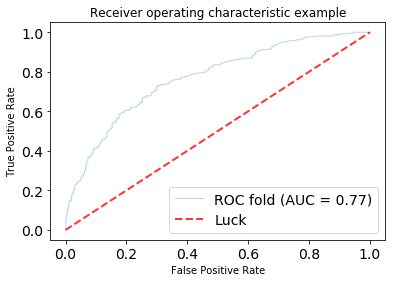

In [66]:
plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold (AUC = %0.2f)' % (roc_auc))

plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Luck', alpha=.8)


plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()
plt.savefig('ROC.png')


In [67]:
from sklearn.metrics import confusion_matrix
import itertools
y_pred = clf.predict(X_test)
cnf_matrix  = confusion_matrix(y_test, y_pred)
cnf_matrix

array([[694, 251],
       [ 85, 176]], dtype=int64)

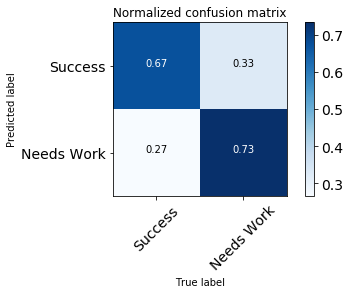

In [68]:
class_names = ['Success','Needs Work']

def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function plots the normalized confusion matrix.
    """
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Predicted label')
    plt.xlabel('True label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
tr_matrix = cnf_matrix.copy()
tr_matrix[0][0] = cnf_matrix[1][1]#.transpose()
tr_matrix[0][1] = cnf_matrix[1][0]
tr_matrix[1][0] = cnf_matrix[0][1]#.transpose()
tr_matrix[1][1] = cnf_matrix[0][0]
#cnf_matrix = cnf_matrix.transpose()
np.set_printoptions(precision=2)

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(tr_matrix, classes=class_names, 
                      title='Normalized confusion matrix')

plt.savefig('confusion.png')

In [88]:
features = trainingdf.columns
toppostdf80 = traindf.drop(traindf.loc[traindf.y80==0].index, axis=0).copy()
toppostdf90 = traindf.drop(traindf.loc[traindf.y90==0].index, axis=0).copy()
print(len(toppostdf80))
print(len(toppostdf90))
X80_raw = toppostdf80.drop(['clap_count', 'detected_language', 'post_creatorId',
       'post_date', 'post_id', 'post_publication_id', 
       'post_tags', 'post_url', 
       'response_count', 'subtitle', 'title', 'unique_slug', 'word_count',
       'archive_date', 'full_text', 'clap_target_q20', 'clap_target_q80',
                            'clap_target_q90','y80','y90','FK_grade','neg','pos'],axis=1).values
X90_raw = toppostdf90.drop(['clap_count', 'detected_language', 'post_creatorId',
       'post_date', 'post_id', 'post_publication_id', 
       'post_tags', 'post_url', 
       'response_count', 'subtitle', 'title', 'unique_slug', 'word_count',
       'archive_date', 'full_text', 'clap_target_q20', 'clap_target_q80',
                            'clap_target_q90','y80','y90','FK_grade','neg','pos'],axis=1).values



804
404


In [250]:
X90_raw

array([[  4.60e+01,   4.00e+00,   3.69e+05, ...,   7.87e-01,   5.00e+00,
          2.20e+01],
       [  1.10e+01,   3.20e+01,   3.35e+05, ...,   8.01e-01,   1.60e+01,
          2.60e+01],
       [  7.00e+00,   1.00e+00,   3.12e+04, ...,   7.87e-01,   3.30e+01,
          2.70e+01],
       ..., 
       [  1.00e+00,   0.00e+00,   0.00e+00, ...,   7.57e-01,   1.00e+00,
          3.30e+01],
       [  8.00e+00,   6.00e+00,   0.00e+00, ...,   7.62e-01,   5.00e+00,
          1.60e+01],
       [  1.00e+00,   4.00e+00,   1.50e+05, ...,   7.58e-01,   3.00e+00,
          1.60e+01]])

In [251]:
#X80 = qScaler.transform(X80_raw).mean(axis=0)
X80 = qScaler.transform([X80_raw.mean(axis=0)])
#X90 = qScaler.transform(X90_raw).mean(axis=0)
X90 = qScaler.transform([X90_raw.mean(axis=0)])

In [252]:
X80

array([[ 0.81,  0.79,  0.88,  0.76,  0.52,  0.14,  0.46,  0.73,  0.43]])

In [253]:
X[230]

array([  7.27e-01,   3.96e-01,   7.70e-01,   6.98e-01,   2.90e-01,
         8.55e-01,   1.86e-01,   1.00e-07,   3.73e-01])

In [305]:
from sklearn.externals import joblib
joblib.dump(clf, 'clf.pkl') 
joblib.dump(qScaler,'qscl.pkl')
pickle.dump(X80,open('X80.p', "wb" ))
pickle.dump(X90,open('X90.p', "wb" ))
pickle.dump(feature_ranks,open('feature_ranks.p', "wb" ))


In [185]:
#%%
top_articles = trainingdf.mean()
#%%
X_top = stdScl.transform([top_articles.values])
#y_predtop = clf.predict(X_top)


NameError: name 'stdScl' is not defined

In [89]:
feature_ranks = pd.DataFrame(
    clf.feature_importances_.T.ravel()[:len(features)],columns=['fval'],
    index=features
)
feature_ranks['order'] = range(len(feature_ranks))
print(feature_ranks.values)

[[ 0.06  0.  ]
 [ 0.13  1.  ]
 [ 0.46  2.  ]
 [ 0.15  3.  ]
 [ 0.07  4.  ]
 [ 0.03  5.  ]
 [ 0.02  6.  ]
 [ 0.05  7.  ]
 [ 0.02  8.  ]]


In [304]:
feature_ranks

,fval,order
image_count,0.038656,0
post_link_count,0.072227,1
publication_follower_count,0.463642,2
read_time,0.156121,3
Gunning_fog,0.106481,4
com,0.042282,5
neu,0.054030,6
question_count,0.029744,7
title_wcount,0.036817,8


In [96]:
predictive_indexes = feature_ranks.sort_values(by='fval',ascending=False)['order'].values
#predictive_features
# List of meta features that were most predictive of funded projects
predictive_features = ['publication followers', 'read time', 'grade level',
                       'number of links', 'neutrality','sentiment','number of images','length title-subtitle','number of questions']
predictive_indexes


array([2, 3, 1, 4, 0, 7, 5, 6, 8])

In [188]:
feature_ranks1 = pd.Series(
    models[2].coef_.T.ravel()[:len(features)],
    index=features
)
print(feature_ranks1.values)

AttributeError: coef_ is only available when using a linear kernel

In [275]:
# Compute the weighted score of the meta features of a project
user_article_score = np.multiply(
    [X[3500]],
    feature_ranks['fval'].values
)
#%%
# Compute the weighted score of the meta features of the average top project
top80_article_score = np.multiply(
    X80,
    feature_ranks['fval'].values
)
top90_article_score = np.multiply(
    X90,
    feature_ranks['fval'].values
)


In [276]:
X_raw[3500]

array([  3.  ,   4.  ,   0.  ,   3.53,  11.1 ,   1.  ,   0.83,   2.  ,  26.  ])

In [277]:
X80_raw.mean(axis=0)

array([  5.21e+00,   8.50e+00,   6.61e+04,   5.47e+00,   1.28e+01,
         7.40e-01,   8.15e-01,   4.72e+00,   2.47e+01])

In [199]:
qScaler.transform([X_raw[230]])

array([[  7.27e-01,   3.96e-01,   7.70e-01,   6.98e-01,   6.86e-01,
          2.83e-01,   2.90e-01,   8.55e-01,   6.74e-01,   1.86e-01,
          8.25e-01,   1.00e-07,   3.73e-01]])

In [204]:
qScaler.transform([X80_raw.mean(axis=0)])

array([[ 0.81,  0.79,  0.88,  0.76,  0.76,  0.53,  0.52,  0.14,  0.63,
         0.46,  0.54,  0.73,  0.43]])

In [201]:
X80

array([ 0.58,  0.58,  0.56,  0.62,  0.61,  0.48,  0.48,  0.55,  0.52,
        0.48,  0.51,  0.54,  0.49])

In [278]:
user_article_score

array([[  2.50e-02,   4.15e-02,   4.64e-08,   7.69e-02,   3.53e-02,
          3.24e-02,   2.96e-02,   1.50e-02,   1.73e-02]])

In [279]:
top80_article_score

array([[ 0.03,  0.06,  0.41,  0.12,  0.06,  0.01,  0.02,  0.02,  0.02]])

In [285]:
#%%
# Combine the weighted scores into a single DataFrame
messy = pd.DataFrame([user_article_score[0,predictive_indexes], top80_article_score[0,predictive_indexes],top90_article_score[0,predictive_indexes]],
                     index=['Your article', 'Top 20% articles', 'Top 10% articles']).T.reset_index()
#%%
# Transform the combined data into tidy format
tidy = pd.melt(
    messy,
    id_vars='index',
    value_vars=['Your article', 'Top 20% articles', 'Top 10% articles'],
    var_name=' '
)

In [286]:
tidy

,index,,value
0,0,Your article,4.636421e-08
1,1,Your article,7.691842e-02
2,2,Your article,3.528066e-02
3,3,Your article,4.146373e-02
4,4,Your article,2.955678e-02
5,5,Your article,3.244192e-02
6,6,Your article,2.503549e-02
7,7,Your article,1.730271e-02
8,8,Your article,1.497613e-02
9,0,Top 20% articles,4.101389e-01


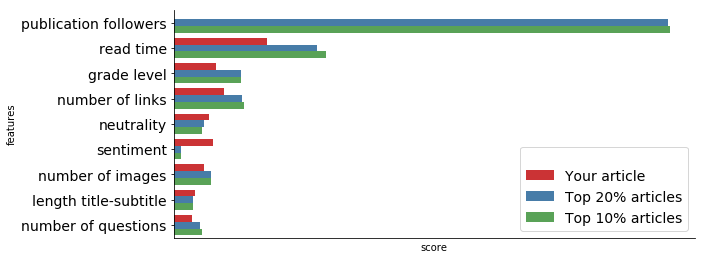

In [311]:


#%%
# Draw a grouped bar plot of the weighted scores
fontsize = 12
plt.figure(figsize=(14,6))
plt.rc('xtick', labelsize=fontsize)
plt.rc('ytick', labelsize=fontsize)
plt.rc('legend', fontsize=fontsize)
sns.factorplot(
    data=tidy,
    y='index',
    x='value',
    hue=' ',
    kind='bar',
    size=4,
    aspect=2,
    palette='Set1',
    orient='h',
    legend_out=False
).set(
    xlabel='score',
    ylabel='features',
    xticks=[]
)
#%%
plt.yticks(range(len(predictive_features)),predictive_features)
plt.savefig('Features.png')
#%%
# Re-label the y-axis and reposition the legend
#labels = trainingdf.columns
#['hyperlinks', 'images', 'innovation words', 'exclamation marks','bolded text', 'length of description']
#plt.yticks(trainingdf.columns.values)
#plt.yticks(predictive_features)

#fig.ax.legend(loc='lower right');
plt.savefig('figure.png', bbox_inches='tight', dpi=300);


In [309]:
clf.predict([X[3500]])

array([0])

In [186]:
 print(models[3].feature_importances_)

[ 0.05  0.07  0.36  0.12  0.11  0.05  0.07  0.03  0.03  0.03  0.04  0.02
  0.03]


In [111]:
print(trainingdf.columns)

Index(['image_count', 'post_link_count', 'publication_follower_count',
       'read_time', 'word_count', 'FK_grade', 'Gunning_fog', 'com', 'neg',
       'neu', 'pos', 'question_count', 'title_wcount'],
      dtype='object')


In [299]:
class_names = ['Fail','Success']
from lime.lime_text import LimeTextExplainer
import lime.lime_tabular
class_names = ['Fail','Success']
X_raw = X
#from lime.lime_text import LimeTextExplainer
import lime.lime_tabular
explainer1 = lime.lime_tabular.LimeTabularExplainer(X, feature_names=trainingdf.columns, class_names=['fail','success'], discretize_continuous=True)
X1 = qScaler.transform(X_raw)
y_pred = models[3].predict(X1)


In [301]:
i=2000
#exp = explainer.explain_instance(X, clf.predict_proba, num_features=6)
exp = explainer1.explain_instance(X1[i], models[3].predict_proba, num_features=4)
#print('Document id: %d' % )
print('Probability =', models[3].predict_proba([X1[i]]))
print('True class: %s' % y[i])


Probability = [[ 0.73  0.27]]
True class: 0


In [302]:
exp.show_in_notebook(show_table=True, show_all=False)

In [267]:
trainingdf.index = range(len(trainingdf))
trainingdf.loc[i,:]

image_count          1.000000
post_link_count      2.000000
read_time            1.460377
word_count         334.000000
FK_ease             80.749612
FK_grade             4.793195
com                  0.986000
neg                  0.064000
neu                  0.788000
pos                  0.148000
Gunning_fog          8.056234
Name: 20, dtype: float64

In [227]:
clf.predict([X[230]])

array([1])

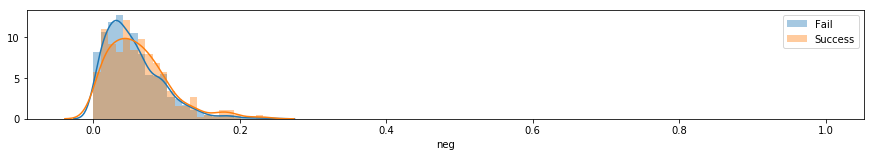

In [213]:
plt.figure(figsize=(15,2))
sns.distplot(traindf.loc[traindf['y_train']==False,'neg'], bins = np.linspace(0,1,100))
sns.distplot(traindf.loc[traindf['y_train'],'neg'], bins = np.linspace(0,1,100))
plt.legend(['Fail','Success'])
#plt.xlim([0,1])
plt.savefig('negative.png')


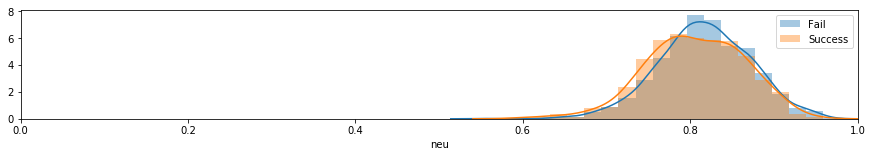

In [195]:
plt.figure(figsize=(15,2))
sns.distplot(traindf.loc[traindf['y_train']==False,'neu'], np.linspace(0,1,50))
sns.distplot(traindf.loc[traindf['y_train'],'neu'], np.linspace(0,1,50))
plt.legend(['Fail','Success'])
plt.xlim([0,1])
plt.savefig('neutral.png')


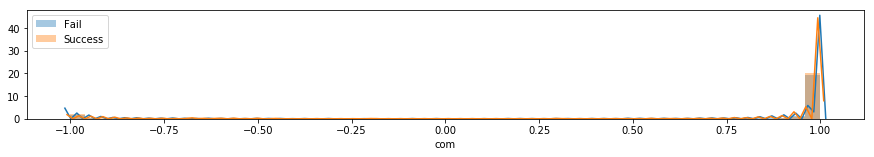

In [205]:
plt.figure(figsize=(15,2))
#sns.distplot(traindf.loc[traindf['y_train']==False,'com'], np.linspace(0,1,50))
sns.distplot(traindf.loc[traindf['y_train']==False,'com'])

#sns.distplot(traindf.loc[traindf['y_train'],'com'], np.linspace(0,1,50))
sns.distplot(traindf.loc[traindf['y_train'],'com'])
plt.legend(['Fail','Success'])
#plt.xlim([0,1])
plt.savefig('neutral.png')


In [316]:
npostdf.loc[3000,'publication_follower_count']

0

In [317]:
npostdf.loc[3000,'image_count']

8

In [318]:
npostdf.loc[3000,'post_link_count']

0

In [71]:
clf0 = models[0]

In [73]:
clf0.class_weight

'balanced'

In [76]:
clf0.coef_

array([[ 0.47,  0.54,  1.44,  1.02, -0.34, -0.48, -0.47,  0.36,  0.21]])

In [77]:
clf.feature_importances_

array([ 0.06,  0.13,  0.46,  0.15,  0.07,  0.03,  0.02,  0.05,  0.02])

In [92]:
features

Index(['image_count', 'post_link_count', 'publication_follower_count',
       'read_time', 'Gunning_fog', 'com', 'neu', 'question_count',
       'title_wcount'],
      dtype='object')

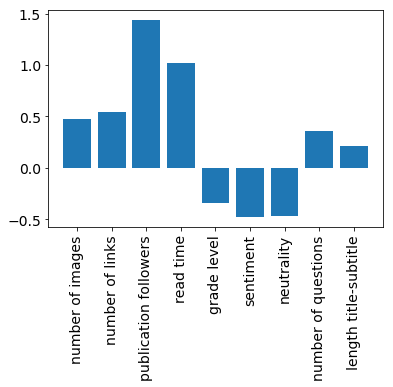

In [100]:
original_order = ['number of images','number of links','publication followers', 'read time', 'grade level',
                       'sentiment','neutrality','number of questions','length title-subtitle']
plt.bar(range(9),clf0.coef_[0])
plt.xticks(range(9),original_order,rotation='vertical')

plt.savefig('LR_coefficients.png',bbox_inches='tight', dpi=300)

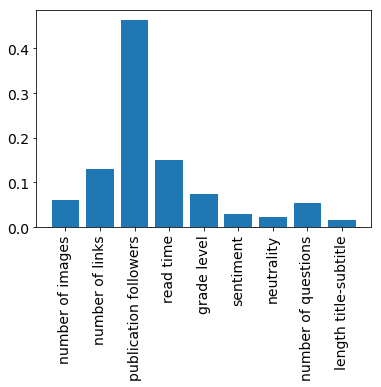

In [101]:
plt.bar(range(9),clf.feature_importances_)
plt.xticks(range(9),original_order,rotation='vertical')
plt.savefig('RF_coefficients.png',bbox_inches='tight', dpi=300)